In [1]:
# 必要なライブラリのインポート
# データの処理および可視化
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc

# 前処理用クラスの呼び出し
import Preprocessing

# 予測モデルの作成
from sklearn.linear_model import LogisticRegression

### 予測モデルの呼び出し

In [2]:
with open('model.pickle', mode = 'rb') as f:
    model = pickle.load(f)

### Testデータの読み込み

In [3]:
test = pd.read_csv('./data/train.csv')

### Testデータの前処理

In [4]:
# クラスの呼び出し
prepro = Preprocessing.Prepro(df)
# One-Hotエンコーディング
df = prepro.one_hot(df)
#　必要な特徴量に削減
df = prepro.drop_feature(df)
# 特徴量と正解データに分解(標準化も適応)
X, y = prepro.label_split(df)

### テストデータによる予測

In [5]:
pred = model.predict(X)

### 結果出力

In [6]:
# 結果の出力
prepro.output(y, pred)

accuracy :  0.8504672897196262
precision :  0.8415584415584415
recall :  0.9025069637883009
f1 score :  0.8709677419354839


### ROC曲線の表示

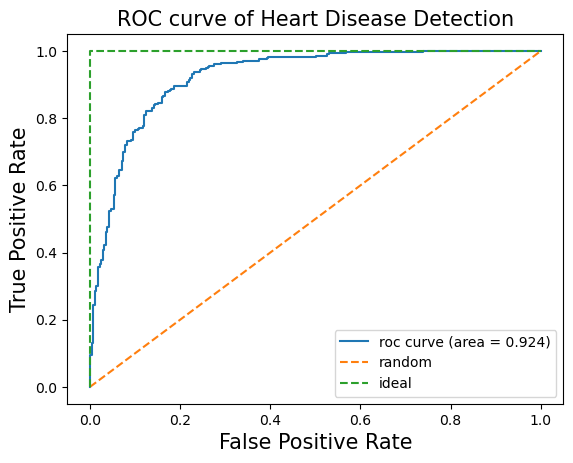

In [7]:
#ROC曲線の描画、AUCの計算（ROC曲線の下側の面積）の計算
y_score = model.predict_proba(X)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.title('ROC curve of Heart Disease Detection',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.show()